Saving synthetic_mall_customers.csv to synthetic_mall_customers.csv


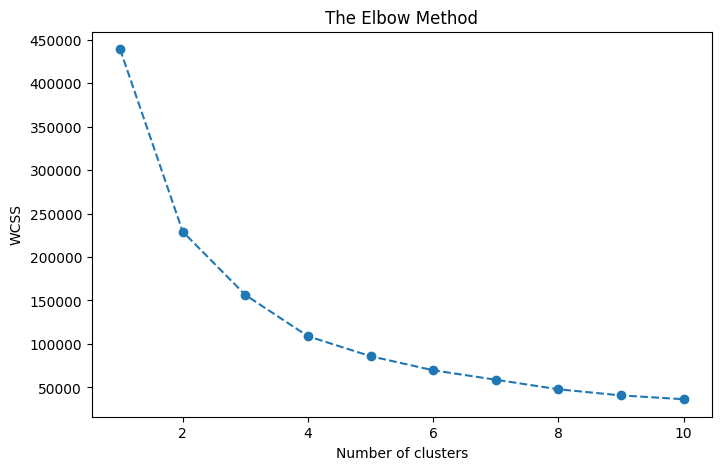

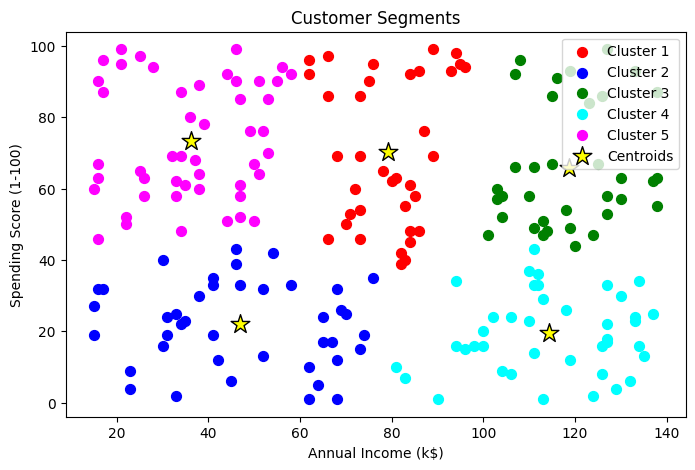

In [2]:


from google.colab import files
uploaded = files.upload()

# Task 2: K-Means Clustering on Synthetic Mall Customer Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Generate Synthetic Dataset
np.random.seed(42)
data = pd.DataFrame({
    'CustomerID': range(1, 201),
    'Age': np.random.randint(18, 70, 200),
    'Annual Income (k$)': np.random.randint(15, 140, 200),
    'Spending Score (1-100)': np.random.randint(1, 100, 200)
})

# Step 2: Select features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Find optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,              # ✅ Explicitly set to avoid warnings
        random_state=42
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Step 4: Apply K-Means with optimal clusters (let’s assume 5)
kmeans = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=10,                  # ✅ Added to fix warning
    random_state=42
)
y_kmeans = kmeans.fit_predict(X)

# Step 5: Visualize Clusters
plt.figure(figsize=(8, 5))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(
        X.values[y_kmeans == i, 0],
        X.values[y_kmeans == i, 1],
        s=50,
        c=colors[i],
        label=f'Cluster {i+1}'
    )

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c='yellow',
    marker='*',
    edgecolor='black',
    label='Centroids'
)

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
